# 📌 Objective

### This notebook is to understand the Indian housing dataset to identify:**
* Data quality issues
*  Price distribution patterns
*  Relationship between property area and price
*  Key numeric correlations influencing house prices

### Import Required Libraries

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
plt.style.use("seaborn-v0_8")
sns.set_palette("deep")

### Load the Dataset

In [6]:
df = pd.read_csv("House Price India.csv")

### Dataset Overview

**Shape of the dataset**

In [7]:
df.shape

(14619, 23)

**Column Names & Data Types**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

**Preview Sample Records**

In [10]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


**Missing Values Analysis**

In [11]:
df.isnull().sum().sort_values(ascending=False)

id                                       0
Area of the basement                     0
Distance from the airport                0
Number of schools nearby                 0
lot_area_renov                           0
living_area_renov                        0
Longitude                                0
Lattitude                                0
Postal Code                              0
Renovation Year                          0
Built Year                               0
Area of the house(excluding basement)    0
Date                                     0
grade of the house                       0
condition of the house                   0
number of views                          0
waterfront present                       0
number of floors                         0
lot area                                 0
living area                              0
number of bathrooms                      0
number of bedrooms                       0
Price                                    0
dtype: int6

**Descriptive Statistics**

In [12]:
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,...,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04
mean,6.762821e+09,42604.546412,3.379233,2.129557,2098.156851,1.509369e+04,1.502326,0.007661,0.232848,3.430399,...,1970.929817,90.930228,122033.064300,52.792843,-114.403996,1996.641836,12754.003078,2.012244,64.951433,5.388063e+05
std,6.237162e+03,67.343747,0.938655,0.769955,928.218740,3.792089e+04,0.540241,0.087196,0.765651,0.664047,...,29.491743,416.230218,19.081451,0.137525,0.141325,691.078387,26059.234785,0.817312,8.936129,3.672294e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010500e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.500000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


### Distribution of House Prices - Histogram

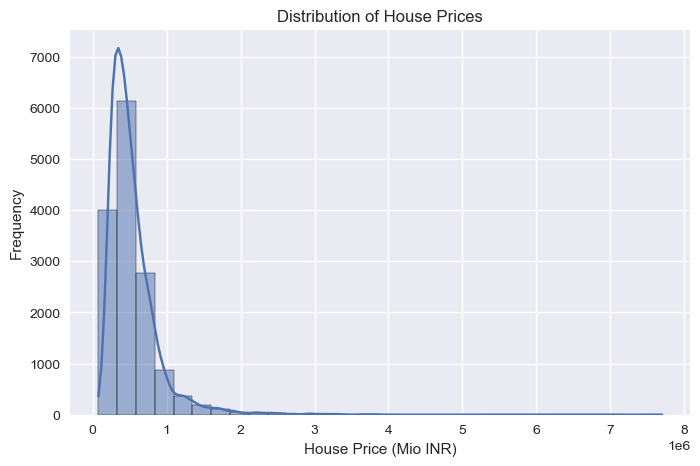

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df["Price"], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("House Price (Mio INR)")
plt.ylabel("Frequency")
plt.show()

### Relationship analysis - Scatter plot (Area vs Price)

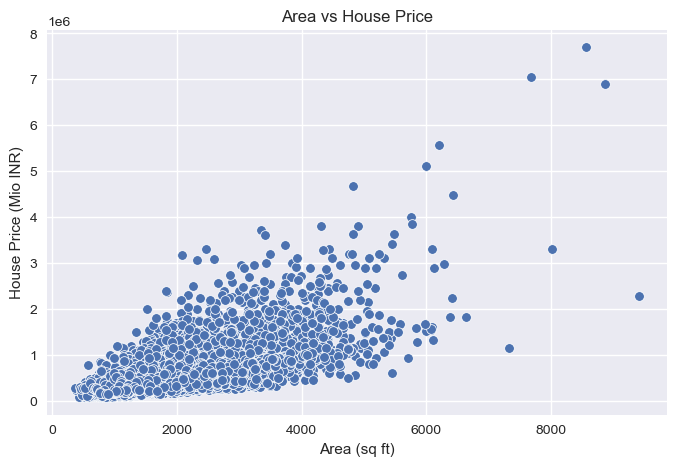

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Area of the house(excluding basement)"], y=df["Price"])
plt.title("Area vs House Price")
plt.xlabel("Area (sq ft)")
plt.ylabel("House Price (Mio INR)")
plt.show()

### Correlation analysis - Correlation Heatmap

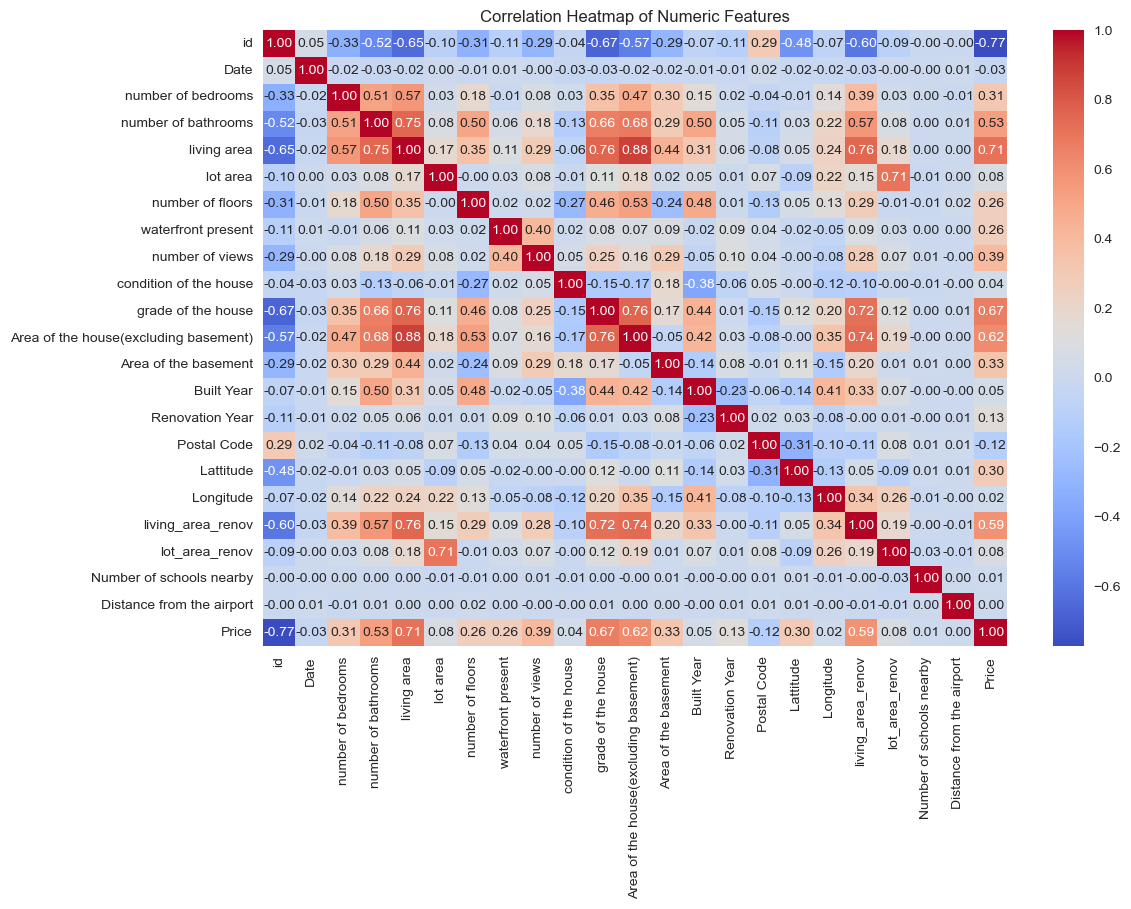

In [17]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), 
            annot=True, 
            cmap="coolwarm", 
            fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

### Key EDA observations

- House prices show a right-skewed distribution
- Area has a strong positive relationship with price
- Some numeric features show high correlation with SalePrice
- Presence of outliers suggests need for preprocessing
- Dataset is suitable for Linear Regression modeling